# Convolutional Neural Network

### Importing the libraries

In [1]:
!pip install split-folders --quiet
!pip install tensorflow --quiet

In [2]:
import pathlib
import splitfolders
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.18.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Unziping the large archive file from the google drive

In [5]:
! unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

# For moving the dataset into the google drive

In [6]:
# ! mv '/content/Rice_Image_Dataset' '/content/drive/MyDrive/kaggle'

# Splitting the datasets into train,test and validation dataset

In [7]:
df_path = pathlib.Path('/content/Rice_Image_Dataset')
splitfolders.ratio(df_path, output='splitted_directory',ratio=(0.7,0.15,0.15))

Copying files: 75000 files [00:11, 6810.95 files/s] 


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/splitted_directory/train',
                                                 target_size = (160,160),
                                                 batch_size = 128,
                                                 subset='training',
                                                 class_mode ='categorical')

Found 52500 images belonging to 5 classes.


### Preprocessing the Test set

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/splitted_directory/test',
                                            target_size = (160,160),
                                            batch_size =128,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 11250 images belonging to 5 classes.


### Preprocessing the Validation dataset

In [10]:
valid_datagen = ImageDataGenerator(rescale = 1./255)
valid_set = valid_datagen.flow_from_directory('/content/splitted_directory/val',
                                            target_size = (160,160),
                                            batch_size =128,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 11250 images belonging to 5 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [11]:
cnn = tf.keras.models.Sequential()

### Adding a first convolution layer

#### Step 1 - Convolution

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[160,160, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Step 2 - Pooling

In [13]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [15]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [16]:
# First Hidden Layer
cnn.add(tf.keras.layers.Dense(units=320, activation='relu'))

### Step 5 - Output Layer

In [17]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [18]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Valid set

In [26]:
cnn.fit(x = training_set, validation_data = valid_set, batch_size=128, epochs = 60)

Epoch 1/60
411/411 ━━━━━━━━━━━━━━━━━━━━ 85s 207ms/step - accuracy: 0.9957 - loss: 0.0123 - val_accuracy: 0.9929 - val_loss: 0.0219
Epoch 2/60
411/411 ━━━━━━━━━━━━━━━━━━━━ 85s 207ms/step - accuracy: 0.9976 - loss: 0.0068 - val_accuracy: 0.9693 - val_loss: 0.0930
Epoch 3/60
411/411 ━━━━━━━━━━━━━━━━━━━━ 83s 201ms/step - accuracy: 0.9943 - loss: 0.0176 - val_accuracy: 0.9927 - val_loss: 0.0236
Epoch 4/60
411/411 ━━━━━━━━━━━━━━━━━━━━ 82s 199ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9951 - val_loss: 0.0170
Epoch 5/60
411/411 ━━━━━━━━━━━━━━━━━━━━ 84s 203ms/step - accuracy: 0.9976 - loss: 0.0075 - val_accuracy: 0.9951 - val_loss: 0.0172
Epoch 6/60
411/411 ━━━━━━━━━━━━━━━━━━━━ 81s 197ms/step - accuracy: 0.9974 - loss: 0.0067 - val_accuracy: 0.9963 - val_loss: 0.0140
Epoch 7/60
411/411 ━━━━━━━━━━━━━━━━━━━━ 83s 201ms/step - accuracy: 0.9985 - loss: 0.0045 - val_accuracy: 0.9937 - val_loss: 0.0214
Epoch 8/60
411/411 ━━━━━━━━━━━━━━━━━━━━ 143s 203ms/step - accuracy: 0.9986 - loss: 

## Part 4 - Prediction on Test dataset

In [27]:
test_prediction=cnn.predict(test_set)

88/88 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step


### Extract the class indices of each predicted data

In [28]:
import numpy as np
prediction_indices=np.argmax(test_prediction,axis=1)
prediction_indices

array([0, 0, 0, ..., 4, 4, 4])

### Extract the class indices of test data

In [29]:
test_indices=test_set.classes
test_indices

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

### Confusion Matrix

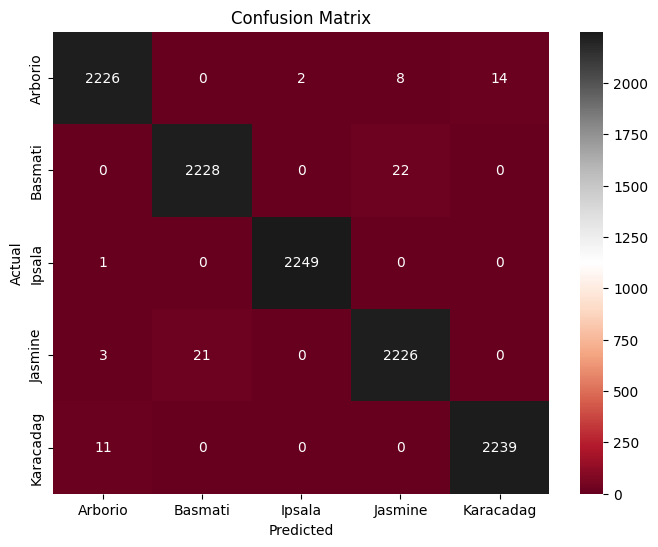

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(test_indices,prediction_indices)
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',ax=ax,cmap='RdGy')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.xaxis.set_ticklabels(test_set.class_indices)
ax.yaxis.set_ticklabels(test_set.class_indices)
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [31]:
from sklearn.metrics import classification_report
report = classification_report(test_indices,prediction_indices,target_names=test_set.class_indices)
print(report)

              precision    recall  f1-score   support

     Arborio       0.99      0.99      0.99      2250
     Basmati       0.99      0.99      0.99      2250
      Ipsala       1.00      1.00      1.00      2250
     Jasmine       0.99      0.99      0.99      2250
   Karacadag       0.99      1.00      0.99      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250



## Part 5 - Making a single prediction

In [33]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import  img_to_array, array_to_img, load_img
test_image = load_img('/content/Basmoti.jpg', target_size = (160,160))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(training_set.class_indices)
print(result)
if result[0][0] == 1:
  prediction = 'Arborio'
elif result[0][1] == 1:
  prediction = 'Basmati'
elif result[0][2] == 1:
  prediction = 'Ipsala'
elif result[0][3] == 1:
  prediction = 'Jasmine'
elif result[0][4] == 1:
  prediction = 'Karacadag'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
[[0. 1. 0. 0. 0.]]
Basmati


In [34]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import  img_to_array, array_to_img, load_img
test_image = load_img('/content/karacadag.jpg', target_size = (160,160))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Arborio'
elif result[0][1] == 1:
  prediction = 'Basmati'
elif result[0][2] == 1:
  prediction = 'Ipsala'
elif result[0][3] == 1:
  prediction = 'Jasmine'
elif result[0][4] == 1:
  prediction = 'Karacadag'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Karacadag


# Open the jpg image by CV2 library and predict on that single image

In [35]:
import cv2

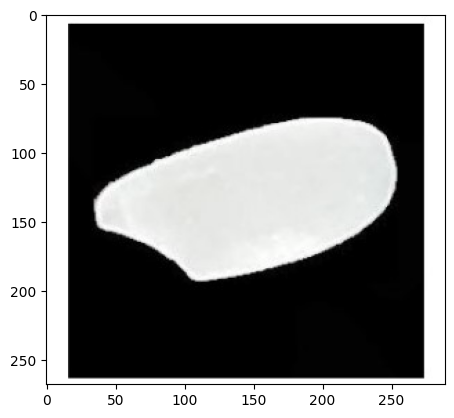

In [36]:
test_img = cv2.imread('/content/Ipsala.jpg')
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [37]:
test_img.shape

(268, 289, 3)

In [38]:
test_img = cv2.resize(test_img,(160,160))

In [39]:
test_input = test_img.reshape((1,160,160,3))

In [40]:
result = cnn.predict(test_input)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


array([[0., 0., 1., 0., 0.]], dtype=float32)

In [41]:
if result[0][0] == 1:
  prediction = 'Arborio'
elif result[0][1] == 1:
  prediction = 'Basmati'
elif result[0][2] == 1:
  prediction = 'Ipsala'
elif result[0][3] == 1:
  prediction = 'Jasmine'
elif result[0][4] == 1:
  prediction = 'Karacadag'
print(prediction)

Ipsala


# Save the model locally

In [43]:
cnn.save("Rice_image_classification_cnn_model.h5")